In [83]:
#Importando as bibliotecas que serão utilizadas
import pandas as pd
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#1. Conhecendo os dados
***

##1.1 Dataset do projeto

### Contratos do MCMV-Financiado com FGTS (dados analíticos) ###

Esta página fornece download dos conjuntos de dados sobre a situação dos empreendimentos e das unidades habitacionais contratadas pelo **Programa Minha Casa, Minha Vida (MCMV)**, com subsídios custeados do Orçamento Geral da União (OGU). Também apresenta as unidades habitacionais financiadas com recursos do FGTS, nas faixas de renda estabelecidas pelo MCMV. E ainda a situação de regularidade dos entes federados no Sistema Nacional de Habitação de Interesse Social (SNHIS), a qual é necessária para participação em algumas modalidades do MCMV.

Os dados fornecidos atendem ao Plano de Dados Abertos do Ministério das Cidades. Os dados disponíveis para download são especialmente úteis para estudo de professores, pesquisadores, alunos, universitários, pós-graduandos e demais interessados na habitação de interesse social. Por isso, também estão disponíveis para download os respectivos dicionários de dados dos conjuntos.

Além das bases de dados abaixo, relativas ao MCMV, também existem dados do PBQP-H - Programa Brasileiro da Qualidade e Produtividade do Habitat, ação governamental da Secretaria Nacional de Habitação que possui importante intersetorialidade com o Programa Minha Casa, Minha Vida.

A periodicidade de publicação dos conjuntos de dados abaixo é, no mínimo, trimestral, acompanhando o previsto no Plano de Dados Abertos do Ministério das Cidades, a partir do dia 20 de março.

### Fontes ###

Fonte: https://www.gov.br/cidades/pt-br/acesso-a-informacao/acoes-e-programas/habitacao/programa-minha-casa-minha-vida/bases-de-dados-do-programa-minha-casa-minha-vida

Fonte dos dados:
https://www.cidades.gov.br/images/stories/ArquivosSNH/ArquivosZIP/dados_abertos_FGTS_ANALITICO_202505.rar

### Dicionário de dados ###
O leiaute do arquivo CSV utilizado segue o leiaute que consta na página 4 do documento abaixo.

https://www.gov.br/cidades/pt-br/acesso-a-informacao/acoes-e-programas/habitacao/programa-minha-casa-minha-vida/arquivos/Dicionarios_SNH_2025_04_14.pdf



### Variáveis utilizadas

- Valor do Financiamento (vlr_subsidio_desconto_ogu)(Orçamento Geral da União) na operação de crédito
para abatimento do valor a ser financiado pelo
mutuário.

- Valor da Renda Familiar (qtd_uh_financiadas):
Quantidade de unidades habitacionais contratadas.

### Determinando o tamanho da amostra ###

O dataset original fornecido pelo governo tem por 1.1 Gb e por volta 6 milhões de linhas, o que torna o processamento lento. Como nosso intuito é didático, usaremos uma amostragem estatisticamente relevante.
Assim, precisamos saber quantas linhas são necessárias para que ela seja "estatisticamente relevante".

Temos os seguintes dados:

Tamanho da População (N): 6.000.000

Nível de Confiança: Escolhemos 95%. É a probabilidade de a amostra refletir a população real.

Margem de Erro: Escolheremos 1%. É o quanto os resultados da sua amostra podem desviar dos resultados reais da população.

Para uma população de 6 milhões de observações, o tamanho da amostra se estabiliza. Usando uma calculadora de tamanho de amostra, para 95% de confiança e 1% de erro, precisaremos de uma amostra minima de 9589 registros.

#### Geração da Amostra
Os seguintes tratamentos foram realizados sobre os dados para uma geração da amostra
1. Foi definido uma amostra de 100.000 registros
2. Foi definido um random state para tentar usar o mesmo comportamento na geração de eventuais outras amostras

In [84]:
''' Código utilizado para geração da amostra
dados = pd.read_csv("dados_abertos_FGTS_ANALITICO_202505.csv")
sample_df = dados.sample(n=100000, random_state=5)
sample_df.to_csv("AMOSTRA_100K_dados_abertos_FGTS_ANALITICO_202505.csv")
'''

' Código utilizado para geração da amostra\ndados = pd.read_csv("dados_abertos_FGTS_ANALITICO_202505.csv")\nsample_df = dados.sample(n=100000, random_state=5)\nsample_df.to_csv("AMOSTRA_100K_dados_abertos_FGTS_ANALITICO_202505.csv")\n'

### Conhecendo o dataset do projeto

In [85]:
dados_raw = pd.read_csv("AMOSTRA_1K_dados_abertos_FGTS_ANALITICO_202505.csv", sep=';') #95% nível de confiança / 1% de margem erro
dados_raw.head(5)

,",,,,,,,,data_referencia",cod_ibge,txt_municipio,mcmv_fgts_txt_uf,txt_regiao,data_assinatura_financiamento,qtd_uh_financiadas,vlr_financiamento,vlr_subsidio_desconto_fgts,vlr_subsidio_desconto_ogu,...,vlr_compra,vlr_renda_familiar,txt_programa_fgts,num_taxa_juros,txt_tipo_imovel,bln_cotista,txt_sistema_amortizacao,dte_nascimento,txt_compatibilidade_faixa_renda,txt_nome_empreendimento
0,02/05/2025,312770,Governador Valadares,MG,Sudeste,2012-01-18,1,"73334,78","7971,974999999999","4006,8070000000007",...,"92000,0","1954,67",Apoio à Produção,"5,0",Novo,N,price,NaN,Faixa 2,NaN
1,02/05/2025,350950,Campinas,SP,Sudeste,2025-04-08,1,"163893,65","2328,0","0,0",...,"264000,0","3039,62",Apoio à Produção,NaN,Novo,NaN,NaN,NaN,Faixa 2,","
2,02/05/2025,312980,Ibirité,MG,Sudeste,2018-03-08,1,"126400,0","3556,8","395,2",...,"158000,0","2711,88",Apoio à Produção,"5,5",Novo,S,price,1988-09-06,Faixa 2,NaN
3,02/05/2025,355030,São Paulo,SP,Sudeste,2019-06-12,1,"156951,41","1162,8","129,2",...,"229792,33","3421,53",Apoio à Produção,"6,5",Novo,S,price,1985-07-26,Faixa 2,NaN
4,02/05/2025,510525,Lucas do Rio Verde,MT,Centro-Oeste,2015-04-14,1,"63567,57000000001","11331,375","2403,625",...,"84300,0","1500,93",Apoio à Produção,"5,0",Novo,N,price,NaN,Faixa 1,NaN


In [86]:
#Identificar a quantidade de dados nulos (Nan) de cada coluna do DataSet
dados_raw.isnull().sum()

,0
",,,,,,,,data_referencia",0
cod_ibge,0
txt_municipio,0
mcmv_fgts_txt_uf,0
txt_regiao,0
data_assinatura_financiamento,77
qtd_uh_financiadas,0
vlr_financiamento,0
vlr_subsidio_desconto_fgts,0
vlr_subsidio_desconto_ogu,0


In [87]:
dados_raw.shape #100.000 observações / 22 colunas

(999, 22)

In [88]:
dados_raw['txt_regiao'].value_counts(normalize = True) * 100

,proportion
txt_regiao,
Sudeste,46.846847
Sul,19.419419
Nordeste,18.818819
Centro-Oeste,12.612613
Norte,2.302302


In [89]:
dados_raw['txt_programa_fgts'].value_counts(normalize = True) * 100

,proportion
txt_programa_fgts,
Carta de Crédito Individual,55.155155
Apoio à Produção,40.140140
Pró-Cotista,2.402402
Carta de Crédito Associativo,2.302302


In [90]:
dados_raw['txt_tipo_imovel'].value_counts(normalize = True) * 100

,proportion
txt_tipo_imovel,
Novo,82.082082
Usado,17.917918


In [91]:
dados_raw['txt_sistema_amortizacao'].value_counts(normalize = True) * 100

,proportion
txt_sistema_amortizacao,
price,90.233074
sac,9.766926


In [92]:
dados_raw['txt_compatibilidade_faixa_renda'].value_counts(normalize = True) * 100

,proportion
txt_compatibilidade_faixa_renda,
Faixa 2,57.457457
Faixa 1,22.922923
Faixa 3,17.517518
Fora MCMV/CVA,2.102102


In [93]:
dados_raw['bln_cotista'].value_counts(normalize = True) * 100

,proportion
bln_cotista,
N,50.990615
S,42.752868
X,6.256517


## 1.2 - Iniciando limpeza e ajuste dos dados ##

### Tratamentos realizados após geração da amostra
Os seguintes tratamentos foram realizados sobre os dados amostrais:
 1. A primeira coluna foi eliminada pois a informação de data de referencia é igual em todas as linhas informando de quando é a informação recuperada.
 2. Foram eliminados os registros duplicados;
 3. Removido da amostra registros que são relativos a financiamentos fora do programa Minha Casa Minha Vida.
 5. Os tipos das colunas foram convertidos de acordo com o seu prefixo.
 6. Foram eliminados os registros onde os valores utilizados nos gráficos e analises exploratórias eram inválidos (nulos ou não positivos);
 7. Criar colunas idade e faixa etarea a partir da informação da data de nascimento, tratando para os cenários onde a data de nascimento não foi informada
 8. Criar coluna derivada do valor de renda familiar que categoriza de acordo com a quantidade de salarios minimos

In [94]:
#Passo 0: Criar um novo dataframe para trabalhar sobre ele mantendo a amostra original para controle
dados_limpos = pd.DataFrame(dados_raw)
dados_raw.isnull().sum()

#Passo 1 - Removendo a primeira coluna de data de referencia que possui valor igual em todas as linhas
dados_limpos = dados_limpos.iloc[:, 1:]

# Passo 2 - Tratamento de linhas duplicadas
duplicadas = dados_limpos.duplicated().sum()
if duplicadas > 0:
    print(f"Encontradas {duplicadas} linhas duplicadas. Removendo-as...")
    dados_limpos.drop_duplicates(inplace=True)
    print(f"Shape após remover duplicatas: {dados_limpos.shape}")
else:
    print("Nenhuma linha duplicada encontrada.")

# Passo 3 - Remover registros onde txt_compatibilidade_faixa_renda são Fora MCMV/CVA para analisar apenas os financiamentos que utilizam MCMV
dados_limpos = dados_limpos[dados_limpos['txt_compatibilidade_faixa_renda'] != 'Fora MCMV/CVA']
print(f"Shape após remover linhas cuja faixa esteja Fora MCMV/CVA': {dados_limpos.shape}")

Nenhuma linha duplicada encontrada.
Shape após remover linhas cuja faixa esteja Fora MCMV/CVA': (978, 21)


### Converte as colunas para o seu tipo mais adequado de acordo com seu prefixo

In [95]:
# Passo 4 Converter colunas
#4.1 - Conversão de colunas numericas

#Função para limpar e converter a string monetária para float no padrão brasileiro
def converter_para_float(valor):
    if isinstance(valor, str):
        # Remove o "R$", espaços em branco extras
        valor_limpo = valor.replace('R$', '').strip()
        # O ponto é separador de milhar e a vírgula é decimal.
        # Precisamos converter para o padrão que o float() entende (ponto como decimal).
        valor_limpo = valor_limpo.replace('.', '').replace(',', '.')
        try:
            return float(valor_limpo)
        except ValueError:
            return None # Ou algum outro valor para indicar erro de conversão
    return valor # Se já for numérico ou None

colunas_de_valores = ['vlr_financiamento', 'vlr_subsidio_desconto_fgts', 'vlr_subsidio_equilíbrio_fgts', 'vlr_subsidio_equilíbrio_ogu', 'vlr_subsidio_desconto_ogu', 'vlr_compra', 'vlr_renda_familiar', 'num_taxa_juros']
for coluna in colunas_de_valores:
    dados_limpos[coluna] = dados_limpos[coluna].apply(converter_para_float)
    print(f"Coluna '{coluna}' convertida para númerica.")

Coluna 'vlr_financiamento' convertida para númerica.
Coluna 'vlr_subsidio_desconto_fgts' convertida para númerica.
Coluna 'vlr_subsidio_equilíbrio_fgts' convertida para númerica.
Coluna 'vlr_subsidio_equilíbrio_ogu' convertida para númerica.
Coluna 'vlr_subsidio_desconto_ogu' convertida para númerica.
Coluna 'vlr_compra' convertida para númerica.
Coluna 'vlr_renda_familiar' convertida para númerica.
Coluna 'num_taxa_juros' convertida para númerica.


/tmp/ipython-input-2112995694.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_limpos[coluna] = dados_limpos[coluna].apply(converter_para_float)


In [96]:
#4.2 Convertendo os campos para seu tipo adequado de acordo com o prefixo de cada um
for col in dados_limpos.columns:
  print(f"Processando coluna: {col} (Tipo original: {dados_limpos[col].dtype})")
  if col.startswith('data_') or col.startswith('dte_'):
      dados_limpos[col] = pd.to_datetime(dados_limpos[col], errors='coerce')
      print(f"  -> Convertida para datetime.")
  elif col.startswith('qtd_'):
      dados_limpos[col] = pd.to_numeric(dados_limpos[col], errors='coerce')
      print(f"  -> Convertida para numérico (quantidade).")
  elif col.startswith('cod_'):
      if not pd.api.types.is_numeric_dtype(dados_limpos[col]):
          dados_limpos[col] = pd.to_numeric(dados_limpos[col], errors='coerce')
      print(f"  -> Processada como código (tentativa de conversão numérica).")

Processando coluna: cod_ibge (Tipo original: int64)
  -> Processada como código (tentativa de conversão numérica).
Processando coluna: txt_municipio (Tipo original: object)
Processando coluna: mcmv_fgts_txt_uf (Tipo original: object)
Processando coluna: txt_regiao (Tipo original: object)
Processando coluna: data_assinatura_financiamento (Tipo original: object)
  -> Convertida para datetime.
Processando coluna: qtd_uh_financiadas (Tipo original: int64)
  -> Convertida para numérico (quantidade).
Processando coluna: vlr_financiamento (Tipo original: float64)
Processando coluna: vlr_subsidio_desconto_fgts (Tipo original: float64)
Processando coluna: vlr_subsidio_desconto_ogu (Tipo original: float64)
Processando coluna: vlr_subsidio_equilíbrio_fgts (Tipo original: float64)
Processando coluna: vlr_subsidio_equilíbrio_ogu (Tipo original: float64)
Processando coluna: vlr_compra (Tipo original: float64)
Processando coluna: vlr_renda_familiar (Tipo original: float64)
Processando coluna: txt_pro

/tmp/ipython-input-2924638026.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_limpos[col] = pd.to_datetime(dados_limpos[col], errors='coerce')
/tmp/ipython-input-2924638026.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_limpos[col] = pd.to_numeric(dados_limpos[col], errors='coerce')
/tmp/ipython-input-2924638026.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [97]:
# Passo 5 Tratar campos nulos e positivos
#Passo 5.1 - Tratamento de campos nulos
#5.1.1 - Definindo colunas que não podem possuir valores nulos (Nan)
colunas_de_valores_que_nao_podem_ter_valores_NaN = [
    'vlr_financiamento',
    'vlr_compra',
    'vlr_renda_familiar',
    'num_taxa_juros'
]

#5.1.2 - Remover linhas com algum valor NaN nas variáveis verificadas.
for coluna in colunas_de_valores_que_nao_podem_ter_valores_NaN:
  dados_limpos = dados_limpos.dropna(subset=[coluna])
  print(f"Shape após remover linhas com NaN em '{coluna}': {dados_limpos.shape}")

#5.2.1 - Definindo colunas que precisam ter valores maiores que zero
colunas_de_valores_que_nao_podem_ter_valores_zero = [
    'vlr_financiamento',
    'vlr_compra',
    'vlr_renda_familiar',
    'num_taxa_juros'
]

#5.2.2 - Remover linhas com algum valor NaN nas variáveis verificadas.
for coluna in colunas_de_valores_que_nao_podem_ter_valores_zero:
  qtd = dados_limpos.query(f'{coluna} <= 0').shape[0]
  print(f'{coluna} : {qtd}')
print(f"Shape após remover linhas que estavam com valores menores ou iguais a zero indevidamente': {dados_limpos.shape}")

Shape após remover linhas com NaN em 'vlr_financiamento': (978, 21)
Shape após remover linhas com NaN em 'vlr_compra': (978, 21)
Shape após remover linhas com NaN em 'vlr_renda_familiar': (978, 21)
Shape após remover linhas com NaN em 'num_taxa_juros': (938, 21)
vlr_financiamento : 0
vlr_compra : 0
vlr_renda_familiar : 0
num_taxa_juros : 0
Shape após remover linhas que estavam com valores menores ou iguais a zero indevidamente': (938, 21)


In [98]:
# Passo 7 - Gerar colunas de idade e faixa etarea
#Função para calcular idade e atribuir 0 quando não tiver data de nascimento
def calcular_idade(data_nascimento):
    if pd.isnull(data_nascimento):
        return 0;
    today = datetime.today()
    return today.year - data_nascimento.year - ((today.month, today.day) < (data_nascimento.month, data_nascimento.day))

#Função para categorizar a faixa etarea de acordo com a idade
def categorizar_idade(idade):
    if idade == 0:
        return 'Sem Data de nascimento cadastrada'
    elif idade >= 15 and idade <= 30:
        return 'Jovens (15-30 anos)'
    elif idade >= 31 and idade <= 45:
        return 'Adultos plenos (31-45 anos)'
    elif idade >= 46 and idade <= 60:
        return 'Adultos seniores (45 anos ou mais)'
    elif idade >= 61:
        return 'Idosos (Acima de 60 anos)'
    else: # Para idades menores que 15 ou outros casos
        return 'Outros'

# Aplicar as funções para criar as colunas 'idade' e 'faixa_etaria'
dados_limpos['idade'] = dados_limpos['dte_nascimento'].apply(calcular_idade)
dados_limpos['faixa_etaria'] = dados_limpos['idade'].apply(categorizar_idade)
dados_limpos['faixa_etaria'].value_counts(normalize = True) * 100

,proportion
faixa_etaria,
Sem Data de nascimento cadastrada,40.831557
Adultos plenos (31-45 anos),33.795309
Jovens (15-30 anos),13.432836
Adultos seniores (45 anos ou mais),9.808102
Idosos (Acima de 60 anos),2.132196


In [99]:
# Passo 8 - Gerar colunas de faixa de renda familiar
# Criar coluna em dados limpos para classificar a renda familiar pela quantidade de salarios minimos

def classificar_renda(renda):
    salario_minimo = 1518
    if renda < salario_minimo:
        return 'Menos que um salário minimo'
    elif renda >= salario_minimo and renda < 2 * salario_minimo:
        return 'Entre 1 e 2 salários minimos'
    elif renda >= 2 * salario_minimo and renda < 3 * salario_minimo:
        return 'Entre 2 e 3 salários minimos'
    elif renda >= 3 * salario_minimo and renda < 4 * salario_minimo:
        return 'Entre 3 e 4 salários minimos'
    elif renda >= 4 * salario_minimo:
        return 'Maior que 4 salários minimos'
    else:
        return None # Para valores nulos ou inválidos

dados_limpos['faixa_renda_familiar'] = dados_limpos['vlr_renda_familiar'].apply(classificar_renda)

print("\nDistribuição por faixa de renda familiar:")
print(dados_limpos['faixa_renda_familiar'].value_counts(dropna=False))


Distribuição por faixa de renda familiar:
faixa_renda_familiar
Entre 1 e 2 salários minimos    608
Entre 2 e 3 salários minimos    139
Menos que um salário minimo      87
Entre 3 e 4 salários minimos     71
Maior que 4 salários minimos     33
Name: count, dtype: int64


# 2 Realizando análise exploratória dos dados amostra #

## 2.1 Gerando histogramas dos valores de financiamento, compra do imóvel e renda familiar

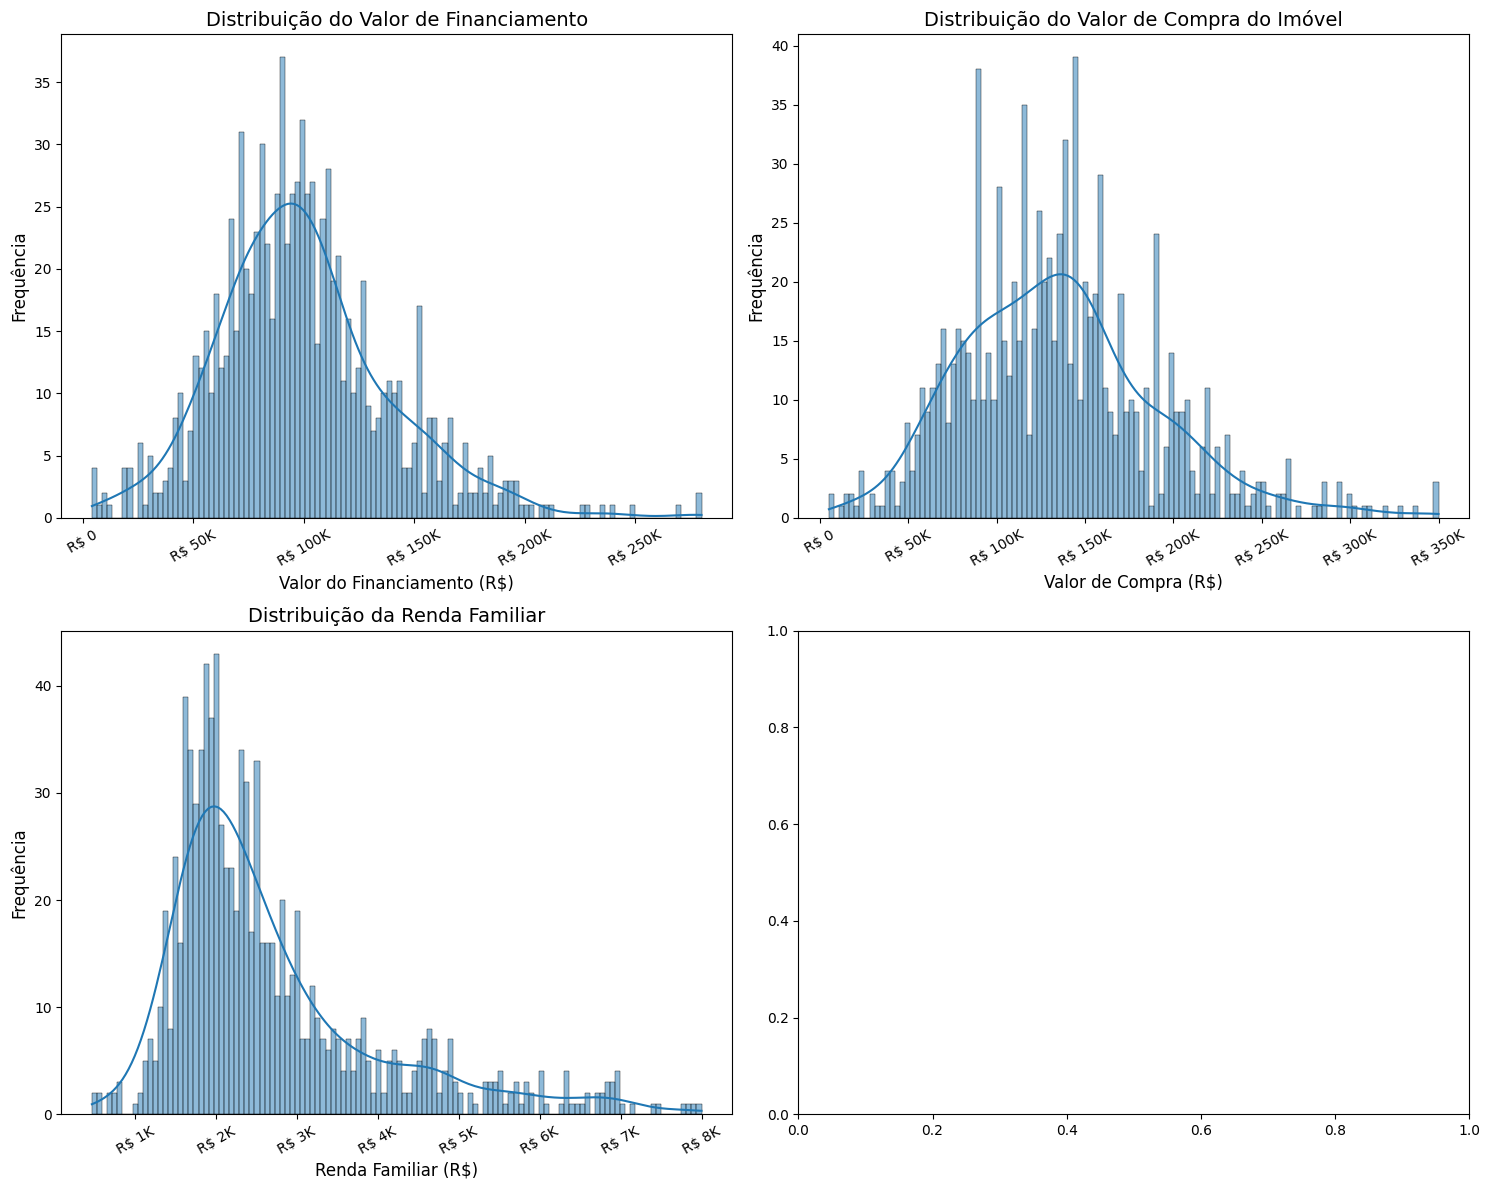

In [100]:
# Colunas para os histogramas
colunas_histograma = ['vlr_financiamento', 'vlr_compra', 'vlr_renda_familiar']
titulos = [
    'Distribuição do Valor de Financiamento',
    'Distribuição do Valor de Compra do Imóvel',
    'Distribuição da Renda Familiar'
]
x_labels = [
    'Valor do Financiamento (R$)',
    'Valor de Compra (R$)',
    'Renda Familiar (R$)'
]

# Formatação para eixos monetários e percentuais
def format_currency(x, pos):
    if x >= 1e6:
        return f'R$ {x*1e-6:,.1f}M'
    elif x >= 1e3:
        return f'R$ {x*1e-3:,.0f}K'
    return f'R$ {x:,.0f}'

def format_percentage(x, pos):
    return f'{x*100:.1f}%'

# Criar os histogramas
fig, axes = plt.subplots(2, 2, figsize=(15, 12)) # Cria uma figura com 2x2 subplots
axes = axes.flatten() # Transforma a matriz 2x2 de eixos em uma lista para facilitar a iteração

for i in range(0,3):
    ax = axes[i]
    sns.histplot(dados_limpos[colunas_histograma[i]], kde=True, ax=ax, bins=120) # kde=True adiciona a curva de densidade
    ax.set_title(titulos[i], fontsize=14)
    ax.set_xlabel(x_labels[i], fontsize=12)
    ax.set_ylabel('Frequência', fontsize=12)

    # Aplicar formatação específica para os eixos
    ax.xaxis.set_major_formatter(mticker.FuncFormatter(format_currency))

    ax.tick_params(axis='x', rotation=30) # Rotacionar rótulos do eixo x para melhor visualização

plt.tight_layout() # Ajusta o espaçamento para evitar sobreposição
plt.show()

Podemos notar que há uma assimetria nas distribuições para a esquerda, o que denota menores valores de compra e financiamento. Isso corresponde a expectativa do programa do governo, uma vez que os imóveis financiados são, em sua grande maioria, destianos a pessoas de baixa renda.

### 2.1.1 Verificando algumas estatísticas discritivas

In [101]:
# Iterar sobre cada coluna para estatísticas individuais
for coluna in colunas_histograma:
    print(f"--- Estatísticas Detalhadas para: {coluna} ---")

    # 2. Medidas de tendência central individuais
    print("  Medidas de Tendência Central:")
    print(f"    Média: {dados_limpos[coluna].mean():.2f}")
    print(f"    Mediana: {dados_limpos[coluna].median():.2f}")
    # A moda pode ter múltiplos valores, então convertemos para lista
    print(f"    Moda: {dados_limpos[coluna].mode().to_list()}")
    print("\n")

    # 3. Medidas de dispersão individuais
    print("  Medidas de Dispersão:")
    print(f"    Desvio Padrão: {dados_limpos[coluna].std():.2f}")
    print(f"    Variância: {dados_limpos[coluna].var():.2f}")
    print(f"    Amplitude (Range): {dados_limpos[coluna].max() - dados_limpos[coluna].min():.2f}")
    print(f"    Intervalo Interquartil (IQR): {dados_limpos[coluna].quantile(0.75) - dados_limpos[coluna].quantile(0.25):.2f}")
    print("\n") #q3 - q1

    # 4. Medidas de forma (Assimetria e Curtose)
    print("  Medidas de Forma:")
    print(f"    Assimetria (Skewness): {dados_limpos[coluna].skew():.2f}")
    print(f"    Curtose (Kurtosis): {dados_limpos[coluna].kurtosis():.2f}") # Curtose de Fisher (0 para normal)
    print("\n")

    # 5. Percentis específicos
    print("  Percentis Específicos:")
    print(f"    Percentil 10: {dados_limpos[coluna].quantile(0.10):.2f}")
    print(f"    Percentil 90: {dados_limpos[coluna].quantile(0.90):.2f}")
    print("-" * 40) # Separador para a próxima variável
    print("\n")

--- Estatísticas Detalhadas para: vlr_financiamento ---
  Medidas de Tendência Central:
    Média: 99634.22
    Mediana: 95928.64
    Moda: [152000.0]


  Medidas de Dispersão:
    Desvio Padrão: 39416.77
    Variância: 1553682083.35
    Amplitude (Range): 276000.00
    Intervalo Interquartil (IQR): 45950.70


  Medidas de Forma:
    Assimetria (Skewness): 0.74
    Curtose (Kurtosis): 1.51


  Percentis Específicos:
    Percentil 10: 55000.00
    Percentil 90: 152000.00
----------------------------------------


--- Estatísticas Detalhadas para: vlr_compra ---
  Medidas de Tendência Central:
    Média: 135105.94
    Mediana: 130000.00
    Moda: [90000.0, 115000.0, 145000.0]


  Medidas de Dispersão:
    Desvio Padrão: 55770.82
    Variância: 3110384225.29
    Amplitude (Range): 345000.00
    Intervalo Interquartil (IQR): 68950.00


  Medidas de Forma:
    Assimetria (Skewness): 0.68
    Curtose (Kurtosis): 0.88


  Percentis Específicos:
    Percentil 10: 68970.00
    Percentil 90: 206

## 2.2 Agrupando os dados por 'UF' e somando as colunas de 'Valores'

In [102]:
# Criando um dataframe por uf ordenado para servir de base para os primeiros gráficos
colunas_para_somar = [
    'vlr_financiamento',
    'vlr_subsidio_desconto_fgts',
    'vlr_subsidio_desconto_ogu',
    'vlr_compra',
    'vlr_renda_familiar'
]

valores_por_uf = dados_limpos.groupby('mcmv_fgts_txt_uf')[colunas_para_somar].sum().reset_index()
valores_por_uf_ordenado = valores_por_uf.sort_values(by='mcmv_fgts_txt_uf')

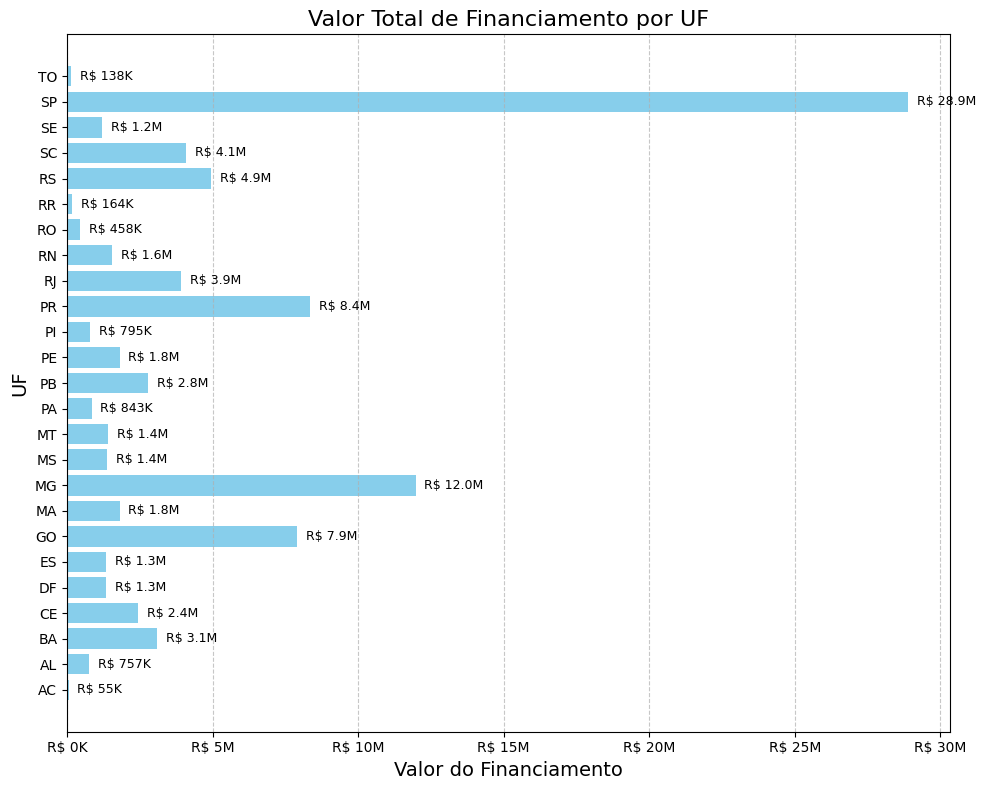

In [103]:
plt.figure(figsize=(10, 8)) # Ajusta o tamanho da figura

bars = plt.barh(
    valores_por_uf_ordenado['mcmv_fgts_txt_uf'], # Eixo Y (Categorias - UFs)
    valores_por_uf_ordenado['vlr_financiamento'], # Eixo X (Valores)
    color='skyblue' # Cor das barras
)

# 3. Adicionar títulos e rótulos
plt.title('Valor Total de Financiamento por UF', fontsize=16)
plt.xlabel('Valor do Financiamento', fontsize=14)
plt.ylabel('UF', fontsize=14)

# 4. Formatar o eixo X para exibir valores monetários de forma mais clara
formatter = mticker.FuncFormatter(lambda x, p: f'R$ {x/1e6:,.0f}M' if x >=1e6 else f'R$ {x/1e3:,.0f}K')
plt.gca().xaxis.set_major_formatter(formatter)

for i, v in enumerate(valores_por_uf_ordenado['vlr_financiamento']):
    uf_label_y_position = i
    valor_formatado = f'R$ {v/1e6:,.1f}M' if v >= 1e6 else f'R$ {v/1e3:,.0f}K'

    plt.text(v + (plt.xlim()[1] * 0.01), # Posição x (valor da barra + pequeno offset)
             uf_label_y_position,        # Posição y (índice da barra)
             valor_formatado,            # Texto a ser exibido
             color='black',
             va='center',                # Alinhamento vertical
             fontsize=9)

plt.grid(axis='x', linestyle='--', alpha=0.7) # Grade apenas no eixo dos valores

plt.tight_layout()

plt.show()

In [104]:
'''
plt.figure(figsize=(8, 6)) # Ajusta o tamanho da figura

plt.boxplot(valores_por_uf_ordenado['vlr_financiamento'], vert=True, patch_artist=True,
            medianprops={'color': 'red', 'linewidth': 2}, # Estiliza a linha da mediana
            boxprops={'facecolor': 'lightblue'}) # Cor da caixa

plt.title('Distribuição dos Valores Totais de Financiamento por UF', fontsize=15)
plt.ylabel('Valor do Financiamento (Agregado por UF)', fontsize=12)
plt.xticks([1], ['Totais de Financiamento por UF']) # Rótulo para o boxplot no eixo x

formatter = mticker.FuncFormatter(lambda x, p: f'R$ {x/1e6:,.0f}M' if x >=1e6 else f'R$ {x/1e3:,.0f}K')
plt.gca().yaxis.set_major_formatter(formatter)

plt.grid(True, linestyle='--', alpha=0.7, axis='y')

plt.tight_layout()

plt.show()
'''

"\nplt.figure(figsize=(8, 6)) # Ajusta o tamanho da figura\n\nplt.boxplot(valores_por_uf_ordenado['vlr_financiamento'], vert=True, patch_artist=True,\n            medianprops={'color': 'red', 'linewidth': 2}, # Estiliza a linha da mediana\n            boxprops={'facecolor': 'lightblue'}) # Cor da caixa\n\nplt.title('Distribuição dos Valores Totais de Financiamento por UF', fontsize=15)\nplt.ylabel('Valor do Financiamento (Agregado por UF)', fontsize=12)\nplt.xticks([1], ['Totais de Financiamento por UF']) # Rótulo para o boxplot no eixo x\n\nformatter = mticker.FuncFormatter(lambda x, p: f'R$ {x/1e6:,.0f}M' if x >=1e6 else f'R$ {x/1e3:,.0f}K')\nplt.gca().yaxis.set_major_formatter(formatter)\n\nplt.grid(True, linestyle='--', alpha=0.7, axis='y')\n\nplt.tight_layout()\n\nplt.show()\n"

Podemos notar que os estados de São Paulo, Minas Gerais e Paraná se apresentam como outliers em uma visualização boxplot do valor financiado agreado por UF. Entretanto, eles não são outliers dado que esses valores são reais e não erros cadastrais.

Podemos tentar agrupar por região

In [105]:
## 1. Definir o mapeamento de UF para Região
mapeamento_uf_regiao = {
    'AC': 'Norte', 'AL': 'Nordeste', 'AP': 'Norte', 'AM': 'Norte',
    'BA': 'Nordeste', 'CE': 'Nordeste', 'DF': 'Centro-Oeste', 'ES': 'Sudeste',
    'GO': 'Centro-Oeste', 'MA': 'Nordeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste',
    'MG': 'Sudeste', 'PA': 'Norte', 'PB': 'Nordeste', 'PR': 'Sul',
    'PE': 'Nordeste', 'PI': 'Nordeste', 'RJ': 'Sudeste', 'RN': 'Nordeste',
    'RS': 'Sul', 'RO': 'Norte', 'RR': 'Norte', 'SC': 'Sul',
    'SP': 'Sudeste', 'SE': 'Nordeste', 'TO': 'Norte'
}

df_com_regiao = valores_por_uf.copy()
df_com_regiao['Regiao'] = df_com_regiao['mcmv_fgts_txt_uf'].map(mapeamento_uf_regiao)

#print("DataFrame com a coluna Regiao:")
#print(df_com_regiao[['mcmv_fgts_txt_uf', 'Regiao', 'vlr_financiamento']].head())

In [106]:
valores_por_regiao = df_com_regiao.groupby('Regiao')['vlr_financiamento'].sum().reset_index()
#valores_por_regiao.head()

## 2.3 Analisando dados agrupados por Região

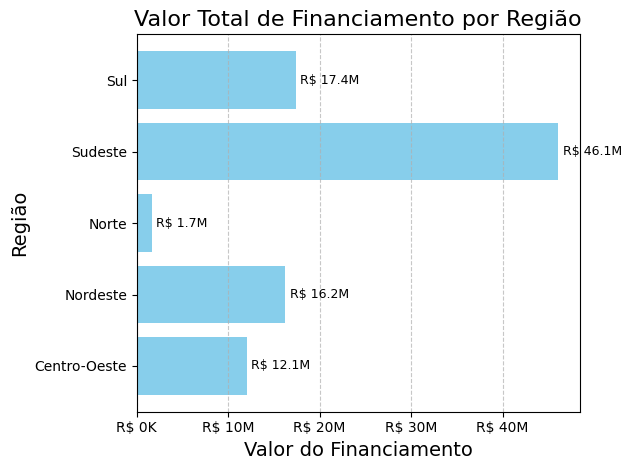

In [107]:
valores_por_regiao_ordenado = valores_por_regiao.sort_values(by='Regiao')

#plt.figure(figsize=(10, 8)) # Ajusta o tamanho da figura

bars = plt.barh(
    valores_por_regiao_ordenado['Regiao'], # Eixo Y (Categorias - UFs)
    valores_por_regiao_ordenado['vlr_financiamento'], # Eixo X (Valores)
    color='skyblue' # Cor das barras
)

# 3. Adicionar títulos e rótulos
plt.title('Valor Total de Financiamento por Região', fontsize=16)
plt.xlabel('Valor do Financiamento', fontsize=14)
plt.ylabel('Região', fontsize=14)

# 4. Formatar o eixo X para exibir valores monetários de forma mais clara
formatter = mticker.FuncFormatter(lambda x, p: f'R$ {x/1e6:,.0f}M' if x >=1e6 else f'R$ {x/1e3:,.0f}K')
plt.gca().xaxis.set_major_formatter(formatter)

for i, v in enumerate(valores_por_regiao_ordenado['vlr_financiamento']):
    uf_label_y_position = i
    valor_formatado = f'R$ {v/1e6:,.1f}M' if v >= 1e6 else f'R$ {v/1e3:,.0f}K'

    plt.text(v + (plt.xlim()[1] * 0.01), # Posição x (valor da barra + pequeno offset)
             uf_label_y_position,        # Posição y (índice da barra)
             valor_formatado,            # Texto a ser exibido
             color='black',
             va='center',                # Alinhamento vertical
             fontsize=9)

plt.grid(axis='x', linestyle='--', alpha=0.7) # Grade apenas no eixo dos valores

plt.tight_layout()

plt.show()

## 2.4 Analisando dados por faixa de renda

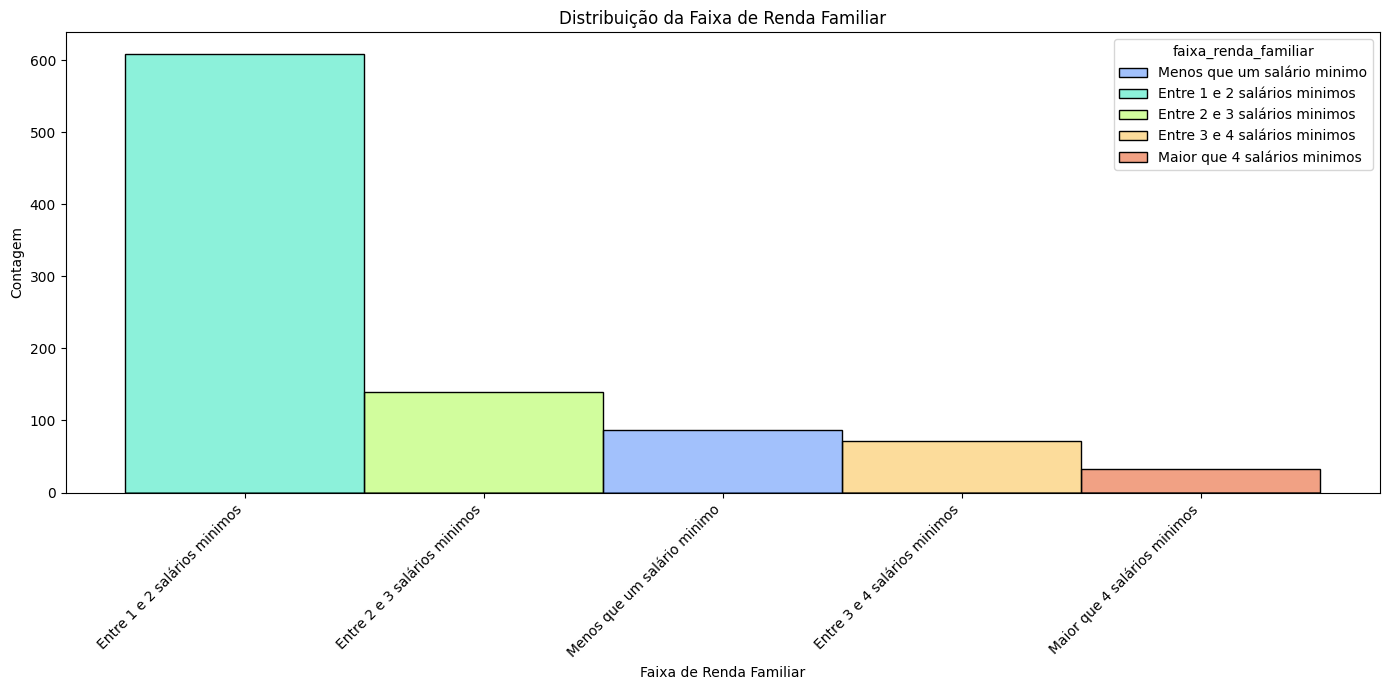

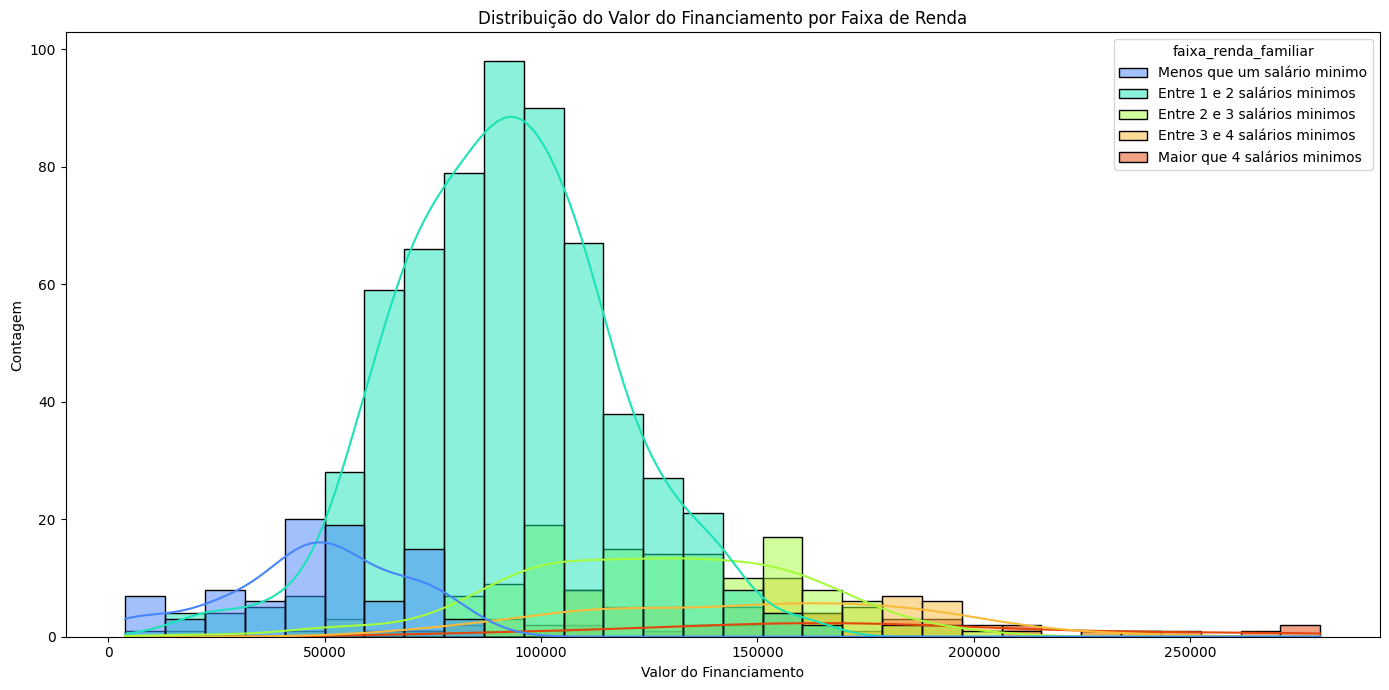

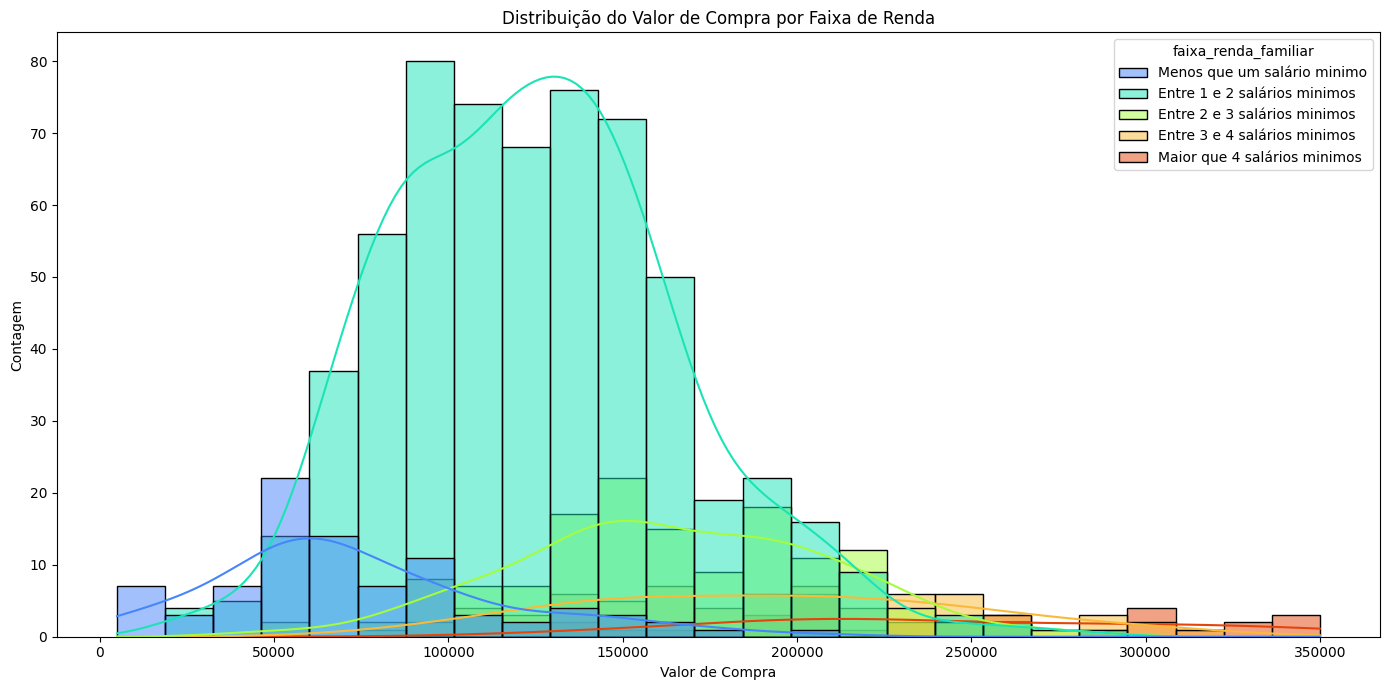

In [108]:
# Histograma de distribuição destacando a faixa de renda da categoria com o valor do financiamento e valor de compra.


# Ordenar as categorias de renda para a legenda
ordem_renda = [
    'Menos que um salário minimo',
    'Entre 1 e 2 salários minimos',
    'Entre 2 e 3 salários minimos',
    'Entre 3 e 4 salários minimos',
    'Maior que 4 salários minimos'
]

# Criar o histograma de distribuição
plt.figure(figsize=(14, 7))
sns.histplot(data=dados_limpos,
             x='faixa_renda_familiar',
             hue='faixa_renda_familiar',
             hue_order=ordem_renda, # Ordena a legenda
             stat='count',
             kde=True,
             palette='turbo')

plt.title('Distribuição da Faixa de Renda Familiar')
plt.xlabel('Faixa de Renda Familiar')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout() # Ajusta o layout para evitar cortes nos rótulos
plt.show()

# Criar histograma para Vlr Financiamento por Faixa de Renda
plt.figure(figsize=(14, 7))
sns.histplot(data=dados_limpos,
             x='vlr_financiamento',
             hue='faixa_renda_familiar',
             hue_order=ordem_renda, # Ordena a legenda
             kde=True,
             palette='turbo',
             common_norm=False) # Normaliza cada histograma separadamente

plt.title('Distribuição do Valor do Financiamento por Faixa de Renda')
plt.xlabel('Valor do Financiamento')
plt.ylabel('Contagem')
plt.tight_layout()
plt.show()


# Criar histograma para Vlr Compra por Faixa de Renda
plt.figure(figsize=(14, 7))
sns.histplot(data=dados_limpos,
             x='vlr_compra',
             hue='faixa_renda_familiar',
             hue_order=ordem_renda, # Ordena a legenda
             kde=True,
             palette='turbo',
             common_norm=False) # Normaliza cada histograma separadamente

plt.title('Distribuição do Valor de Compra por Faixa de Renda')
plt.xlabel('Valor de Compra')
plt.ylabel('Contagem')
plt.tight_layout()
plt.show()

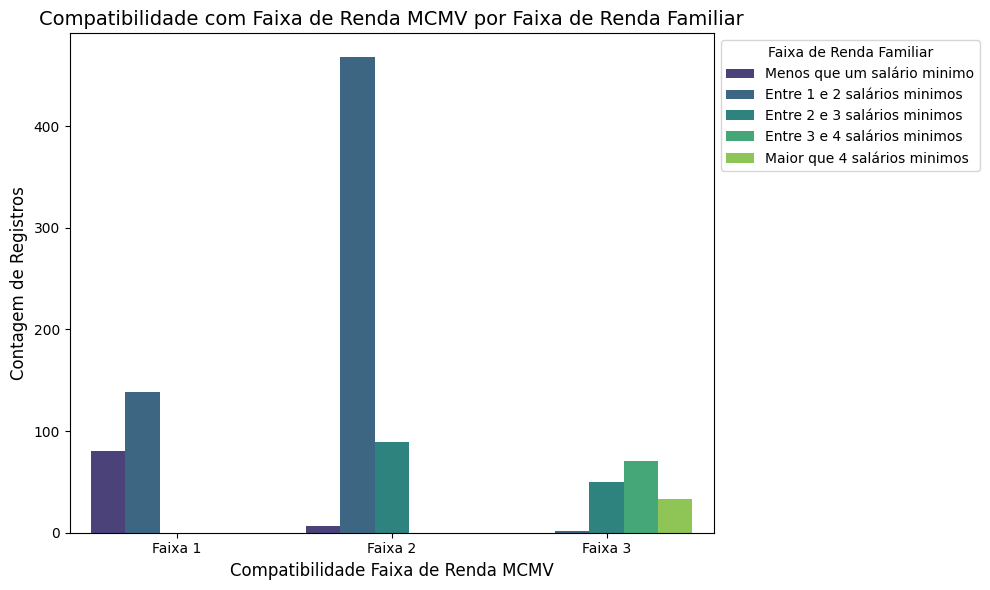

In [109]:
# Histograma comprovando a correlação entre faixa de renda e txt_compatibilidade_faixa_renda

# Define a ordem desejada para as faixas de compatibilidade de renda
ordem_compatibilidade = ['Faixa 1', 'Faixa 2', 'Faixa 3']

# Define a ordem desejada para as faixas de renda familiar para a legenda
ordem_renda = [
    'Menos que um salário minimo',
    'Entre 1 e 2 salários minimos',
    'Entre 2 e 3 salários minimos',
    'Entre 3 e 4 salários minimos',
    'Maior que 4 salários minimos'
]

# Cria o histograma para txt_compatibilidade_faixa_renda por faixa_renda_categoria
plt.figure(figsize=(10, 6)) # Ajusta o tamanho da figura

sns.countplot(
    data=dados_limpos,
    x='txt_compatibilidade_faixa_renda',
    hue='faixa_renda_familiar',
    order=ordem_compatibilidade, # Ordena o eixo x
    hue_order=ordem_renda,       # Ordena a legenda (hue)
    palette='viridis'            # Escolhe uma paleta de cores
)

# Adiciona títulos e labels
plt.title('Compatibilidade com Faixa de Renda MCMV por Faixa de Renda Familiar', fontsize=14)
plt.xlabel('Compatibilidade Faixa de Renda MCMV', fontsize=12)
plt.ylabel('Contagem de Registros', fontsize=12)

# Rotaciona os rótulos do eixo x para melhor visualização, se necessário
plt.xticks(rotation=0)

# Adiciona a legenda fora do gráfico para melhor visualização
plt.legend(title='Faixa de Renda Familiar', loc='upper left', bbox_to_anchor=(1, 1))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Mostra o gráfico
plt.show()

In [110]:
#Calcular valor médio, mediana e desvio padrão do valor financiado

# Calcular média, mediana e desvio padrão do valor financiado
media_financiamento = dados_limpos['vlr_financiamento'].mean()
mediana_financiamento = dados_limpos['vlr_financiamento'].median()
desvio_padrao_financiamento = dados_limpos['vlr_financiamento'].std()

print(f"Média do Valor Financiado: R$ {media_financiamento:.2f}")
print(f"Mediana do Valor Financiado: R$ {mediana_financiamento:.2f}")
print(f"Desvio Padrão do Valor Financiado: R$ {desvio_padrao_financiamento:.2f}")

Média do Valor Financiado: R$ 99634.22
Mediana do Valor Financiado: R$ 95928.64
Desvio Padrão do Valor Financiado: R$ 39416.77


In [111]:
# Calcular quantidade de registros e os valores médio e mediana do valor financiado, valor de renda e do valor de compra para cada faixa de renda arredondando para duas casas decimal quando for necessário ordenando pelas faixas de rendas. Formatar valores em reais

# Agrupar por 'faixa_renda_categoria' e calcular as estatísticas
analise_por_renda = dados_limpos.groupby('faixa_renda_familiar').agg(
    quantidade_registros=('faixa_renda_familiar', 'size'),
    media_vlr_financiamento=('vlr_financiamento', 'mean'),
    mediana_vlr_financiamento=('vlr_financiamento', 'median'),
    media_vlr_renda=('vlr_renda_familiar', 'mean'),
    mediana_vlr_renda=('vlr_renda_familiar', 'median'),
    media_vlr_compra=('vlr_compra', 'mean'),
    mediana_vlr_compra=('vlr_compra', 'median')
)

# Arredondar para duas casas decimais
analise_por_renda = analise_por_renda.round(2)

# Ordenar pelas faixas de renda na ordem desejada
analise_por_renda = analise_por_renda.loc[ordem_renda]

# Formatar os valores monetários em reais
colunas_monetarias = [
    'media_vlr_financiamento', 'mediana_vlr_financiamento',
    'media_vlr_renda', 'mediana_vlr_renda',
    'media_vlr_compra', 'mediana_vlr_compra'
]

for col in colunas_monetarias:
    analise_por_renda[col] = analise_por_renda[col].apply(lambda x: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))

# Imprimir o resultado
#print("\nAnálise por Faixa de Renda Familiar:")
#analise_por_renda

## 2.5 Analisando dados por faixa etaria

<bound method DataFrame.count of      cod_ibge          txt_municipio mcmv_fgts_txt_uf    txt_regiao  \
0      312770  Governador Valadares                MG       Sudeste   
2      312980               Ibirité                MG       Sudeste   
3      355030             São Paulo                SP       Sudeste   
4      510525    Lucas do Rio Verde                MT  Centro-Oeste   
5      432300                Viamão                RS           Sul   
..        ...                    ...              ...           ...   
993    355220              Sorocaba                SP       Sudeste   
994    410100                Ampére                PR           Sul   
995    520549      Cidade Ocidental                GO  Centro-Oeste   
996    412550  São José dos Pinhais                PR           Sul   
997    313670          Juiz de Fora                MG       Sudeste   

    data_assinatura_financiamento  qtd_uh_financiadas  vlr_financiamento  \
0                      2012-01-18     

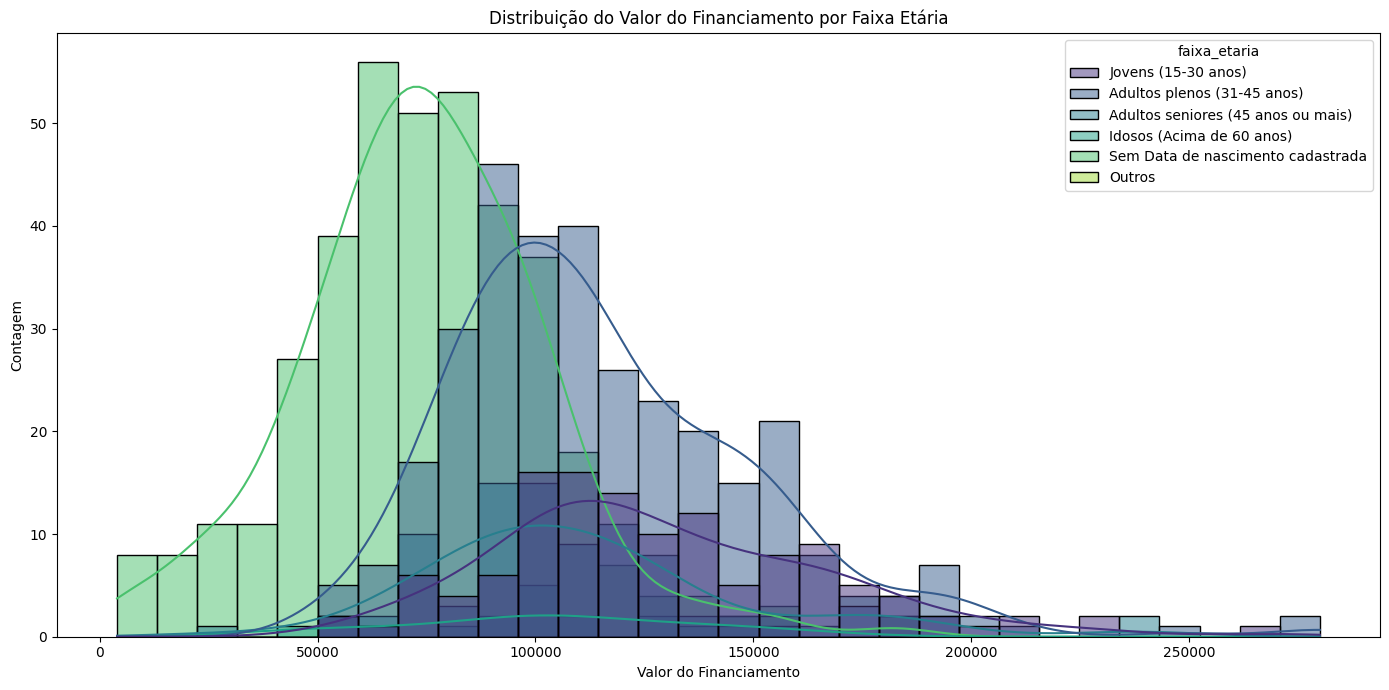

In [112]:
# Histograma dos valores financiados pela faixa etarea
# Ordenar as categorias de idade para a legenda
ordem_idade = [
    'Jovens (15-30 anos)',
    'Adultos plenos (31-45 anos)',
    'Adultos seniores (45 anos ou mais)',
    'Idosos (Acima de 60 anos)',
    'Sem Data de nascimento cadastrada',
    'Outros' # Manter "Outros" por último se houver
]

print(dados_limpos.count)

# Criar histograma para Vlr Financiamento por Faixa Etária
plt.figure(figsize=(14, 7))
sns.histplot(data=dados_limpos,
             x='vlr_financiamento',
             hue='faixa_etaria',
             hue_order=ordem_idade,  # Ordena a legenda
             kde=True,
             palette='viridis',
             common_norm=False) # Normaliza cada histograma separadamente

plt.title('Distribuição do Valor do Financiamento por Faixa Etária')
plt.xlabel('Valor do Financiamento')
plt.ylabel('Contagem')
plt.tight_layout()
plt.show()

# Agrupar por 'faixa_etaria_categoria' e calcular as estatísticas
analise_por_idade = dados_limpos.groupby('faixa_etaria').agg(
    quantidade_registros=('faixa_etaria', 'size'),
    media_vlr_financiamento=('vlr_financiamento', 'mean'),
    mediana_vlr_financiamento=('vlr_financiamento', 'median'),
    media_vlr_renda=('vlr_renda_familiar', 'mean'),
    mediana_vlr_renda=('vlr_renda_familiar', 'median'),
    media_vlr_compra=('vlr_compra', 'mean'),
    mediana_vlr_compra=('vlr_compra', 'median')
)

# Arredondar para duas casas decimais
analise_por_idade = analise_por_idade.round(2)

# Ordenar pelas faixas de idade na ordem desejada
# Certifica-se de que 'Outros' está presente no índice antes de tentar reordenar
# Se 'Outros' não estiver presente nos dados, loc[ordem_idade] pode dar erro.
# Uma forma mais robusta é usar reindex
analise_por_idade = analise_por_idade.reindex(ordem_idade)

# Formatar os valores monetários em reais
colunas_monetarias_idade = [
    'media_vlr_financiamento', 'mediana_vlr_financiamento',
    'media_vlr_renda', 'mediana_vlr_renda',
    'media_vlr_compra', 'mediana_vlr_compra'
]

for col in colunas_monetarias_idade:
    # Verifica se a coluna não é totalmente NaN antes de aplicar a formatação
    if not analise_por_idade[col].isnull().all():
      analise_por_idade[col] = analise_por_idade[col].apply(
          lambda x: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.') if pd.notna(x) else 'N/A'
          )


# Imprimir o resultado
#print("\nAnálise por Faixa Etária:")
#analise_por_idade

Observação: existe uma indicação que as regiões Sul e sudeste são os maiores beneficiados do programa MCMV em termos absolutos.

## 3.1 Matriz de correlação das variáveis

In [113]:
dados_corr =  pd.DataFrame(dados_limpos)

colunas = ["txt_municipio", "mcmv_fgts_txt_uf", "txt_regiao", "txt_tipo_imovel", "txt_sistema_amortizacao", "bln_cotista", "txt_programa_fgts", "txt_compatibilidade_faixa_renda", "faixa_etaria",  "faixa_renda_familiar"]

label_encoder = LabelEncoder()

for coluna in colunas:
    dados_corr[coluna] = label_encoder.fit_transform(dados_corr[coluna])

dados_corr.head(10)

,cod_ibge,txt_municipio,mcmv_fgts_txt_uf,txt_regiao,data_assinatura_financiamento,qtd_uh_financiadas,vlr_financiamento,vlr_subsidio_desconto_fgts,vlr_subsidio_desconto_ogu,vlr_subsidio_equilíbrio_fgts,...,num_taxa_juros,txt_tipo_imovel,bln_cotista,txt_sistema_amortizacao,dte_nascimento,txt_compatibilidade_faixa_renda,txt_nome_empreendimento,idade,faixa_etaria,faixa_renda_familiar
0,312770,157,8,3,2012-01-18,1,73334.78,7971.975,4006.807,10917.25800,...,5.00,0,0,0,NaT,1,NaN,0,4,0
2,312980,173,8,3,2018-03-08,1,126400.00,3556.800,395.200,17099.99000,...,5.50,0,1,0,1988-09-06,1,NaN,36,0,0
3,355030,385,23,3,2019-06-12,1,156951.41,1162.800,129.200,7716.71000,...,6.50,0,1,0,1985-07-26,1,NaN,40,0,1
4,510525,220,10,0,2015-04-14,1,63567.57,11331.375,2403.625,13199.99175,...,5.00,0,0,0,NaT,0,NaN,0,4,4
5,432300,411,20,4,2014-02-24,1,88876.36,8049.525,1707.475,13199.99175,...,4.50,0,0,0,NaT,1,NaN,0,4,0
6,261110,292,13,1,2015-10-30,1,98000.00,1743.225,369.775,13199.99175,...,5.00,0,0,0,NaT,1,NaN,0,4,0
7,520140,14,6,0,2011-03-10,1,80724.00,2232.000,744.000,0.00000,...,4.50,0,0,0,NaT,1,NaN,0,4,0
8,250400,75,12,1,2013-05-17,1,78998.19,0.000,0.000,0.00000,...,6.66,0,0,0,NaT,2,NaN,0,4,2
9,310620,47,8,3,2023-09-28,1,124000.00,20303.000,0.000,22091.96000,...,4.50,1,1,0,1996-03-22,0,NaN,29,3,0
10,355030,385,23,3,2017-08-02,1,152000.00,0.000,0.000,0.00000,...,7.66,1,1,0,1991-10-01,2,NaN,33,0,2


<Axes: >

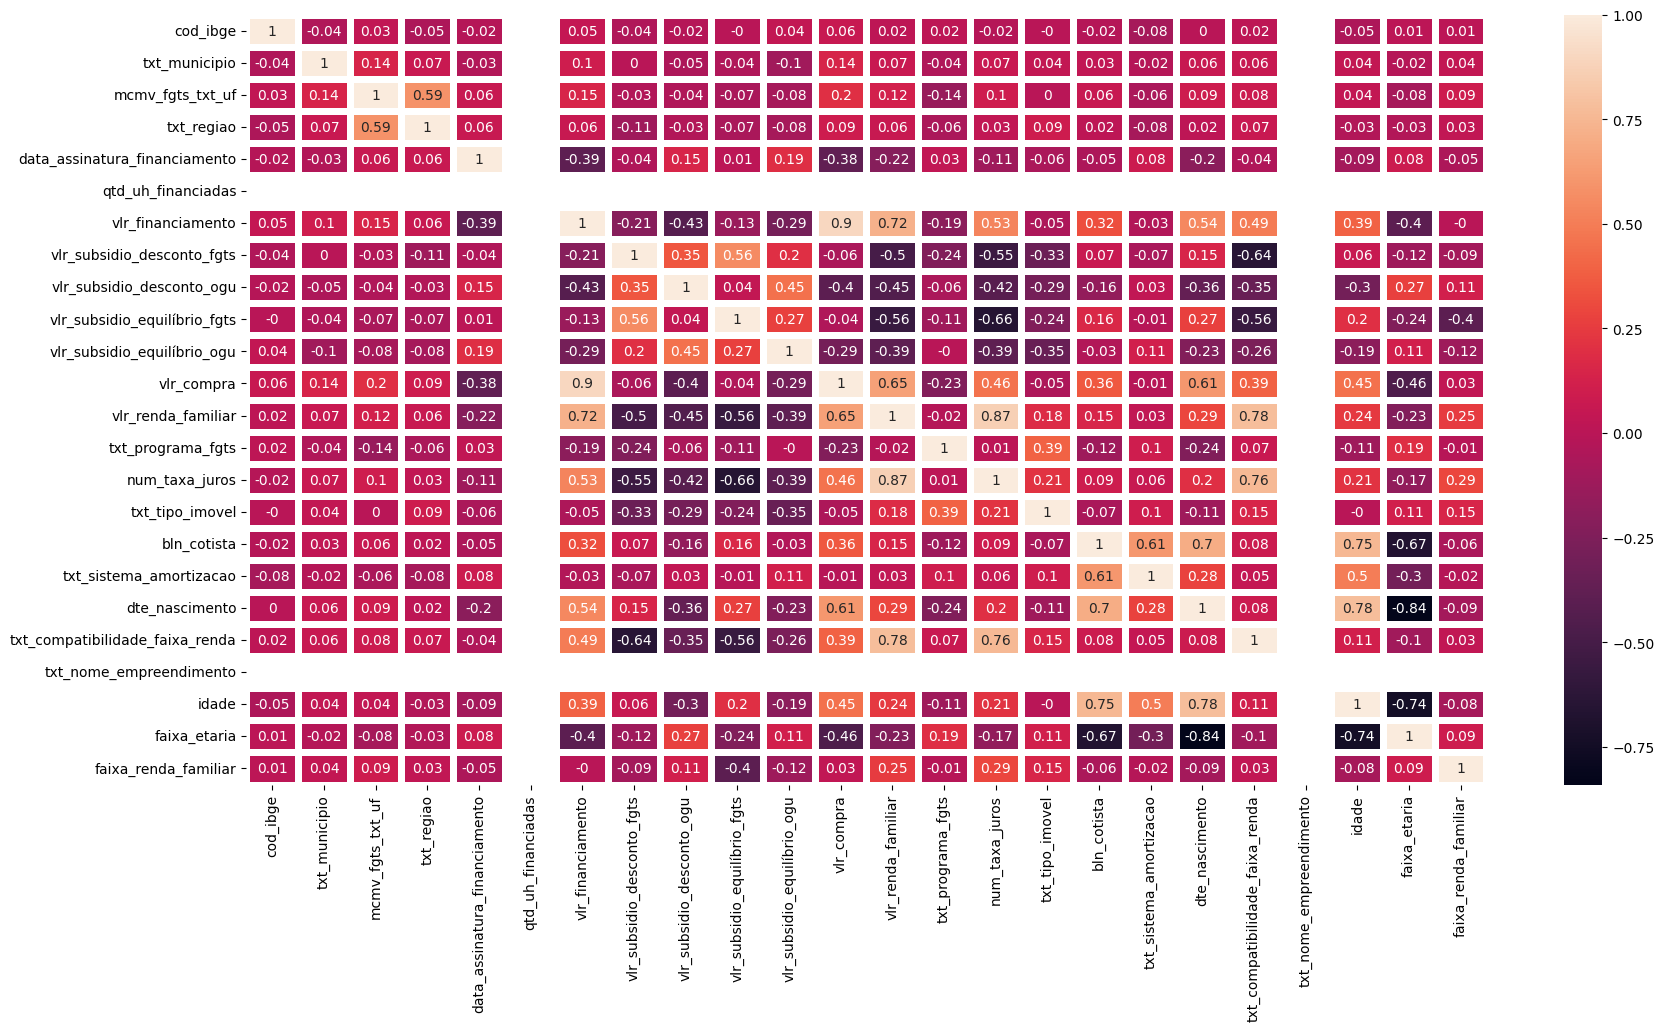

In [114]:
correlation_matrix = dados_corr.corr().round(2)

fig, ax = plt.subplots(figsize=(20,10))

sns.heatmap(data=correlation_matrix, annot=True, linewidths=5, ax=ax)

# 3.0 Otimizando a alocação de recursos usando Algoritmos Genéticos

## 3.1 Objetivo do problema

Suponha um dado um orçamento fixo para subsídios do programa MCMV (por exemplo, R$ 500 milhões) para um determinado período. O objetivo do algoritmo é maximizar o número total de unidades habitacionais (qtd_uh_financiadas) que podem ser contratadas dentro desse orçamento. Esta é uma abordagem de otimização de dados que remete ao clássico problema da mochila (https://pt.wikipedia.org/wiki/Problema_da_mochila).

Cada contrato no dataset é um "item" que podemos escolher financiar ou não.

3.2 Resolvendo o problema usando AGs

In [115]:
!pip install deap
from deap import base, creator, tools, algorithms
import random

In [116]:
#Selecionando as colunas que realmente vamos usar
colunas_necessarias = [
    'vlr_subsidio_desconto_ogu',
    'vlr_subsidio_equilíbrio_ogu',
    'qtd_uh_financiadas'
]

# Criando as colunas 'custo' e 'beneficio' para o nosso problema
# O custo é a soma de todos os subsídios do governo (OGU), enquanto o benefício é a quantidade de unidades habitacionais
# Queremos maximizar o benefício dado um custo fixo.
dados_limpos['custo'] = dados_limpos['vlr_subsidio_desconto_ogu'] + dados_limpos['vlr_subsidio_equilíbrio_ogu']
dados_limpos['beneficio'] = dados_limpos['qtd_uh_financiadas']

# Filtrando os dados para manter apenas contratos que têm algum custo e algum benefício
df_problema = dados_limpos[(dados_limpos['custo'] > 0) & (dados_limpos['beneficio'] > 0)].copy()

# Resetando o index para garantir que seja contínuo de 0 até N-1
df_problema.reset_index(drop=True, inplace=True)

print(f"Total de contratos válidos para o problema: {len(df_problema)}")
print("Visualização do DataFrame processado:")
print(df_problema.head())

Total de contratos válidos para o problema: 444
Visualização do DataFrame processado:
   cod_ibge          txt_municipio mcmv_fgts_txt_uf    txt_regiao  \
0    312770  Governador Valadares                MG       Sudeste   
1    312980               Ibirité                MG       Sudeste   
2    355030             São Paulo                SP       Sudeste   
3    510525    Lucas do Rio Verde                MT  Centro-Oeste   
4    432300                Viamão                RS           Sul   

  data_assinatura_financiamento  qtd_uh_financiadas  vlr_financiamento  \
0                    2012-01-18                   1           73334.78   
1                    2018-03-08                   1          126400.00   
2                    2019-06-12                   1          156951.41   
3                    2015-04-14                   1           63567.57   
4                    2014-02-24                   1           88876.36   

   vlr_subsidio_desconto_fgts  vlr_subsidio_desconto_o

### 3.1.1 Parâmetros de entrada do algoritmo

In [117]:
print("\n--- Definindo Parâmetros do Algoritmo ---")

# --- Parâmetros do Problema ---
ORCAMENTO_TOTAL = 1_000_000 #10_000_000
N_ITENS = len(df_problema)

print(f"ORCAMENTO_TOTAL={ORCAMENTO_TOTAL}")
print(f"N_ITENS={N_ITENS}")



--- Definindo Parâmetros do Algoritmo ---
ORCAMENTO_TOTAL=1000000
N_ITENS=444


### 3.1.2 Definindo os parâmetros do AG

In [118]:
# --- Parâmetros do AG ---
TAMANHO_POPULACAO = 1000
PROB_CRUZAMENTO = 0.7  # Probabilidade de cruzamento
PROB_MUTACAO = 0.05     # Probabilidade de mutação
NUM_GERACOES = 200


In [119]:

# Extraindo os dados para vetores NumPy para performance
CUSTOS = df_problema['custo'].to_numpy()
BENEFICIOS = df_problema['beneficio'].to_numpy()

print(f"Resumo:")
print(f"-------------------------------------------")
print(f"Orçamento Total: R$ {ORCAMENTO_TOTAL:,.2f}")
print(f"Número de Contratos (tamanho do cromossomo): {N_ITENS}")
print(f"Tamanho da População: {TAMANHO_POPULACAO}")
print(f"Número de Gerações: {NUM_GERACOES}")



Resumo:
-------------------------------------------
Orçamento Total: R$ 1,000,000.00
Número de Contratos (tamanho do cromossomo): 444
Tamanho da População: 1000
Número de Gerações: 200


### 3.1.3 Configurando o DEAP

In [120]:
# 1. Definição do Fitness e do Indivíduo
# Queremos maximizar o fitness, por isso 'weights=(1.0,)'
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
# O indivíduo será uma lista de bits (0 ou 1) com o fitness definido acima
creator.create("Individual", list, fitness=creator.FitnessMax)

# 2. Inicialização da "Toolbox"
# A toolbox armazena as funções que o AG usará
toolbox = base.Toolbox()

# 3. Registro dos Operadores Genéticos na Toolbox

SEED = 13
random.seed(SEED)

# Atributo do gene: será 0 ou 1
toolbox.register("attr_bool", random.randint, 0, 1)

# Estrutura do indivíduo: será uma repetição do 'attr_bool', N_ITENS vezes
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, N_ITENS)

# Estrutura da população: será uma lista de indivíduos
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Função de avaliação (fitness): definida na próxima célula
def fitnessFunction(individual):
    """
    Função de fitness. Calcula o benefício total de uma solução.
    Se o custo exceder o orçamento, o fitness é 0 (penalidade).
    Retorna uma tupla, como exigido pelo DEAP.
    """
    custo_total = np.sum(np.array(individual) * CUSTOS)
    beneficio_total = np.sum(np.array(individual) * BENEFICIOS)

    #print(f"Custo Total: R$ {custo_total:,.2f}")
    #print(f"Benefício Total: {beneficio_total}")

    if custo_total > ORCAMENTO_TOTAL:
        return 0,  # Retorna 0 como fitness se o orçamento for excedido
    return beneficio_total,

toolbox.register("evaluate", fitnessFunction)

# Operador de Cruzamento: Two Point Crossover
toolbox.register("mate", tools.cxTwoPoint)

# Operador de Mutação: Flip Bit, com probabilidade de 5% para cada gene
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)

# Operador de Seleção: Tournament Selection, com 3 indivíduos competindo
toolbox.register("select", tools.selTournament, tournsize=3)

print("Toolbox configurada com sucesso.")


Toolbox configurada com sucesso.


/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.11/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


### 3.1.4 Executando a evolução do AG

In [121]:
print("\n--- Executando a Evolução ---")

# Cria a população inicial
pop = toolbox.population(n=TAMANHO_POPULACAO)

# HallOfFame armazena o melhor indivíduo encontrado durante a evolução
hof = tools.HallOfFame(1)

# Statistics para coletar dados da evolução
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

# Executa o algoritmo genético
# O `eaSimple` é um algoritmo padrão da biblioteca DEAP
pop, logbook = algorithms.eaSimple(pop, toolbox,
                                   cxpb=PROB_CRUZAMENTO,
                                   mutpb=PROB_MUTACAO,
                                   ngen=NUM_GERACOES,
                                   stats=stats,
                                   halloffame=hof,
                                   verbose=True) # verbose=True imprime o log

print("\nEvolução concluída!")


--- Executando a Evolução ---
gen	nevals	avg    	std    	min	max
0  	1000  	222.108	10.3411	190	252
1  	717   	231.125	8.18849	206	257
2  	723   	237.721	10.6505	0  	261
3  	686   	243.093	16.8667	0  	265
4  	703   	241.177	44.3045	0  	267
5  	754   	237.644	61.8777	0  	267
6  	744   	228.709	80.5714	0  	271
7  	728   	223.988	89.3667	0  	272
8  	709   	225.231	90.9975	0  	277
9  	678   	221.463	97.1152	0  	277
10 	719   	221.673	98.9992	0  	278
11 	722   	228.85 	94.3436	0  	282
12 	731   	221.031	103.638	0  	282
13 	703   	232.278	95.3511	0  	282
14 	727   	229.767	99.6062	0  	283
15 	723   	230.472	100.651	0  	283
16 	712   	228.405	104.153	0  	285
17 	719   	219.603	111.906	0  	285
18 	709   	232.253	102.921	0  	285
19 	716   	230.336	105.77 	0  	286
20 	745   	231.976	105.417	0  	288
21 	699   	232.667	106.091	0  	289
22 	738   	225.964	112.316	0  	289
23 	708   	227.996	111.536	0  	289
24 	753   	229.518	110.837	0  	290
25 	746   	228.041	112.637	0  	292
26 	743   	226.532	114.3

# 4.0 Análise de resultados

In [122]:
# ==============================================================================
# CÉLULA 6: ANÁLISE E VISUALIZAÇÃO DOS RESULTADOS
# ==============================================================================
print("\n--- Melhor Solução Encontrada ---")

# O melhor indivíduo está no Hall of Fame (hof)
melhor_individuo = hof[0]
melhor_fitness = melhor_individuo.fitness.values[0]

# Calcula o custo e benefício da melhor solução
custo_final = np.sum(np.array(melhor_individuo) * CUSTOS)
beneficio_final = np.sum(np.array(melhor_individuo) * BENEFICIOS)
num_contratos_selecionados = np.sum(melhor_individuo)

print(f"Número de Unidades Habitacionais (Benefício) Financiadas: {int(beneficio_final)}")
print(f"Número de Contratos Selecionados: {num_contratos_selecionados}")
print(f"Custo Total do Subsídio: R$ {custo_final:,.2f}")
print(f"Orçamento Total Disponível: R$ {ORCAMENTO_TOTAL:,.2f}")
print(f"Percentual do Orçamento Utilizado: {(custo_final / ORCAMENTO_TOTAL) * 100:.2f}%")


--- Melhor Solução Encontrada ---
Número de Unidades Habitacionais (Benefício) Financiadas: 312
Número de Contratos Selecionados: 312
Custo Total do Subsídio: R$ 999,962.75
Orçamento Total Disponível: R$ 1,000,000.00
Percentual do Orçamento Utilizado: 100.00%


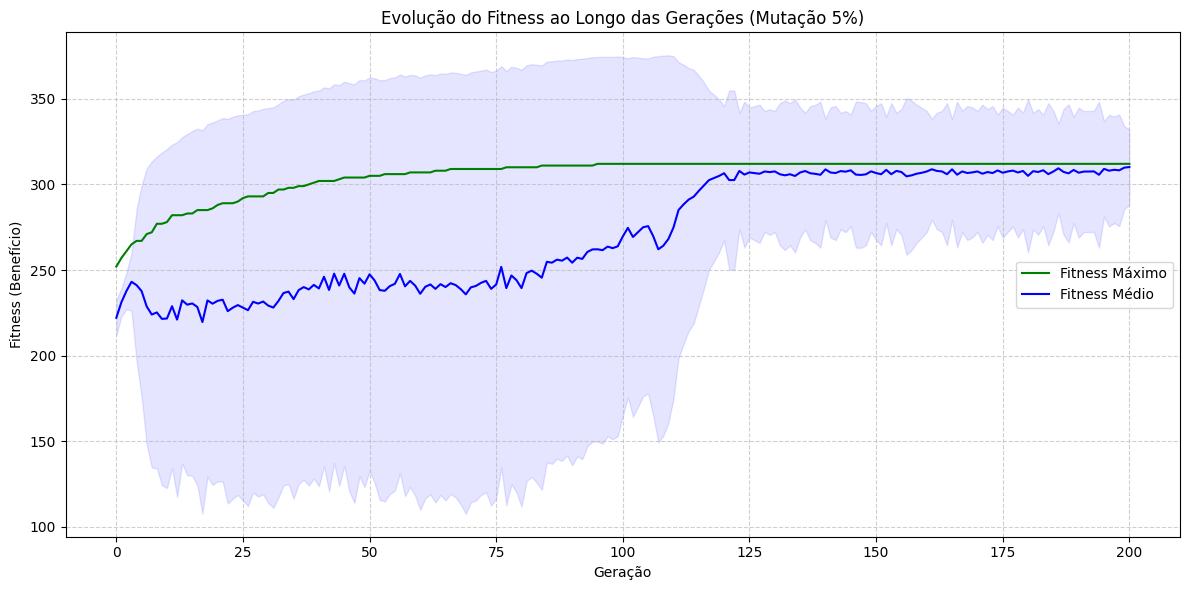

In [123]:
def plot_evolution_graph(logbook):
    """
    Plota um gráfico mostrando a evolução do fitness (médio, máximo e mínimo)
    ao longo das gerações do algoritmo genético.

    Args:
        logbook: O objeto logbook da biblioteca DEAP contendo as estatísticas
                 da execução do algoritmo.
    """
    # Extrai as estatísticas do logbook
    gen = logbook.select("gen")
    avg_fitness = logbook.select("avg")
    max_fitness = logbook.select("max")
    min_fitness = logbook.select("min")
    std_fitness = logbook.select("std")

    # Cria a figura e os eixos para o gráfico
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # --- Eixo Principal (Fitness) ---
    # Plota o fitness máximo e médio
    line1 = ax1.plot(gen, max_fitness, "g-", label="Fitness Máximo")
    line2 = ax1.plot(gen, avg_fitness, "b-", label="Fitness Médio")

    # Preenche a área entre (média + desvio padrão) e (média - desvio padrão)
    # para visualizar a dispersão dos resultados.
    upper_bound = np.array(avg_fitness) + np.array(std_fitness)
    lower_bound = np.array(avg_fitness) - np.array(std_fitness)
    ax1.fill_between(gen, lower_bound, upper_bound, color='blue', alpha=0.1, label='Desvio Padrão')


    # Configurações do eixo principal
    ax1.set_xlabel("Geração")
    ax1.set_ylabel("Fitness (Benefício)")
    ax1.set_title("Evolução do Fitness ao Longo das Gerações (Mutação 5%)")
    ax1.grid(True, linestyle='--', alpha=0.6)

    # Unindo as legendas de ambos os eixos
    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc="center right")

    # Melhora a visualização
    plt.tight_layout()
    plt.show()

# Para usar com seus dados, chame a função passando seu logbook real:
# plot_evolution_graph(log) # Onde 'log' é a variável que guarda seu logbook
plot_evolution_graph(logbook) # Usando o logbook de exemplo
